# Maps for paper

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np

## Energy contributions in 2050

In [12]:
df = pd.read_csv("../data/2050-energy-projections.csv")
df["solar"] = df["resPV_pct"] + df["comPV_pct"] + df["utilPV_pct"]
df["wind"] = df["on_shore_wind_pct"] + df["off_shore_wind_pct"]
df["solar_and_wind"] = df["solar"] + df["wind"]
df["solar"] = 100 * df["solar"] / df["solar_and_wind"]
df["wind"] = 100 * df["wind"] / df["solar_and_wind"]
df = df[["country", "solar", "wind", "total_power_GW"]]
# drop last row, which is the world
df = df.drop(df.index[-1])

In [13]:
df.loc[df["country"] == "Russian Federation", "country"] = "Russia"
df.loc[df["country"] == "Congo, Dem. Republic", "country"] = "Dem. Rep. Congo" 
df.loc[df["country"] == "Dominican Republic", "country"] = "Dominican Rep."
df.loc[df["country"] == "Korea, Dem. People's Rep.", "country"] = "North Korea"
df.loc[df["country"] == "Korea, Republic of", "country"] = "South Korea"
df.loc[df["country"] == "Iran, Islamic Republic", "country"] = "Iran"
df.loc[df["country"] == "Bosnia and Herzegovina", "country"] = "Bosnia and Herz."
df.loc[df["country"] == "Chinese Taipei", "country"] = "Taiwan"
df.loc[df["country"] == "Macedonia, Republic of", "country"] = "North Macedonia"
df.loc[df["country"] == "Moldova, Republic of", "country"] = "Moldova"
df.loc[df["country"] == "Slovak Republic", "country"] = "Slovakia"
df.loc[df["country"] == "Syrian Arab Republic", "country"] = "Syria"
df.loc[df["country"] == "Tanzania, United Republic of", "country"] = "Tanzania"
df.loc[df["country"] == "Czech Republic", "country"] = "Czechia"

/tmp/ipykernel_32484/2584729142.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_32484/2584729142.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


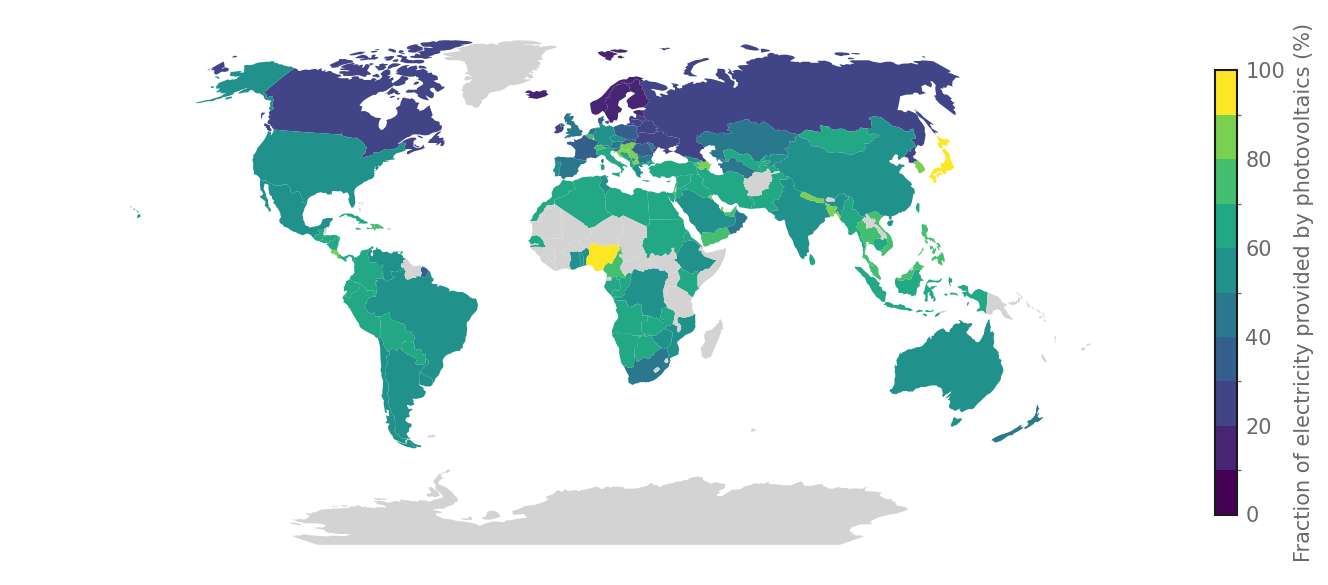

In [14]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df, left_on="name", right_on="country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="solar",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Fraction of electricity provided by photovoltaics (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
# fig.colorbar(sm, ax=ax, label='Solar Value')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/2050-energy-percentage.pdf", bbox_inches="tight")

## % reduction maps

In [15]:
solar = pd.read_csv("../results/aggregate_yearly_solar_power.csv")
solar = solar[solar.Year==1]
solar["Fraction"] = 100 * solar["Fraction"]
name_mapping = {
    "United States": "United States of America",
    "DR Congo": "Dem. Rep. Congo",
    "Republic of the Congo": "Congo",
    "Dominican Republic": "Dominican Rep.",
    "Türkiye": "Turkey",
    "South Sudan": "S. Sudan",
    "Central African Republic": "Central African Rep.",
    "Czech Republic": "Czechia",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
}
solar["Country"] = solar["Country"].replace(name_mapping)

/tmp/ipykernel_32484/1259187711.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_32484/1259187711.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


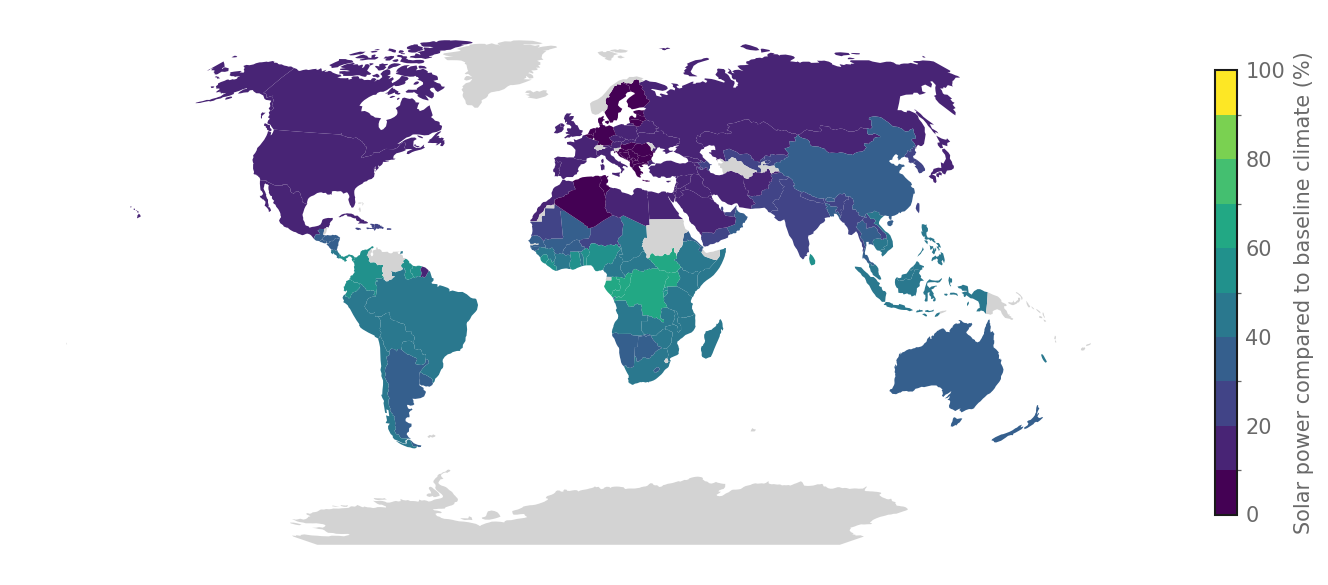

In [16]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(solar, left_on="name", right_on="Country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="Fraction",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Solar power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
# fig.colorbar(sm, ax=ax, label='Solar Value')
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/solar-power-NW-year1.pdf", bbox_inches="tight")

In [17]:
wind = pd.read_csv("../results/aggregate_yearly_wind_power_simple.csv")
wind = wind[wind.Year==1]
wind["Fraction"] = 100 * wind["Fraction"]
name_mapping = {
    "United States": "United States of America",
    "DR Congo": "Dem. Rep. Congo",
    "Republic of the Congo": "Congo",
    "Dominican Republic": "Dominican Rep.",
    "Türkiye": "Turkey",
    "South Sudan": "S. Sudan",
    "Central African Republic": "Central African Rep.",
    "Czech Republic": "Czechia",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
}
wind["Country"] = wind["Country"].replace(name_mapping)

/tmp/ipykernel_32484/3933129687.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_32484/3933129687.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


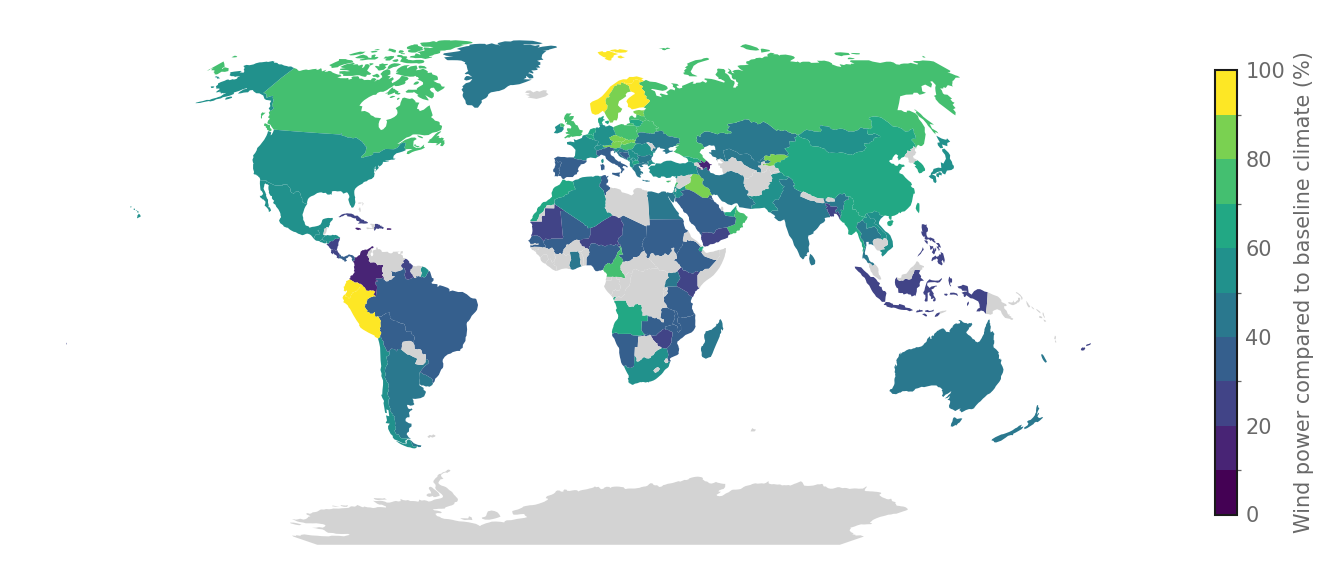

In [18]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(wind, left_on="name", right_on="Country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="Fraction",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Wind power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/wind-power-NW-year1.pdf", bbox_inches="tight")

In [44]:
df2 = df.rename(columns={"solar": "solar_contribution_baseline"})
df2 = df2.rename(columns={"wind": "wind_contribution_baseline"})
df2 = df2.rename(columns={"total_power_GW": "total_power_baseline_GW"})
df2["solar_contribution_baseline"] = df2["solar_contribution_baseline"] / 100
df2["wind_contribution_baseline"] = df2["wind_contribution_baseline"] / 100
solar["solar_fraction_NW"] = solar["Fraction"] / 100
wind["wind_fraction_NW"] = wind["Fraction"] / 100


df2 = df2.merge(solar, left_on="country", right_on="Country", how="left")
df2 = df2.merge(wind, left_on="country", right_on="Country", how="left")
df2 = df2.drop(columns=["Country_x", "Country_y", "solar", "wind"])
df2 = df2.drop(columns=["Fraction_x", "Fraction_y", "Year_x", "Year_y"])
df2["solar+wind_fraction_NW"] = (
    df2["solar_contribution_baseline"] * df2["solar_fraction_NW"] + df2["wind_contribution_baseline"] * df2["wind_fraction_NW"]
)
df2["solar+wind_pct_NW"] = 100 * df2["solar+wind_fraction_NW"]


/tmp/ipykernel_32484/4186394422.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_32484/4186394422.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


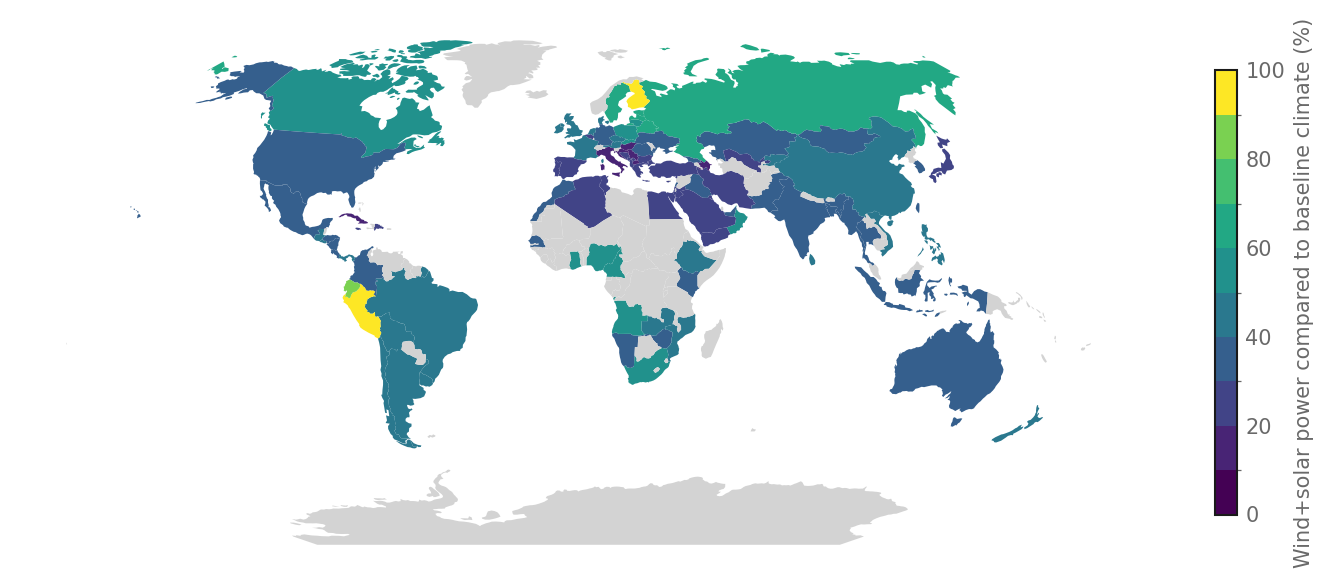

In [45]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.merge(df2, left_on="name", right_on="country", how="left")
world = world.to_crs("+proj=wintri")


default_color = "lightgrey"

cmap = plt.cm.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 11))
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(0, 101, 10)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(1, 1)
sm = world.plot(
    column="solar+wind_pct_NW",
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        "label": f"Wind+solar power compared to baseline climate (%)",
        "orientation": "vertical",
        "shrink": 0.8,
    },
    ax=ax,
    missing_kwds={"color": default_color},
)
ax.set_axis_off()
ax.grid(False)
plt.tight_layout()
plt.savefig("../results/overall-power-NW-year1.pdf", bbox_inches="tight")

In [48]:
df2.to_csv("../results/solar+wind-NW-year1.csv")

In [49]:
df2

,country,solar_contribution_baseline,wind_contribution_baseline,total_power_baseline_GW,solar_fraction_NW,wind_fraction_NW,solar+wind_fraction_NW,solar+wind_pct_NW
0,Albania,0.687017,0.312983,2.1,0.087322,0.509465,0.219446,21.944608
1,Algeria,0.627891,0.372109,53.8,0.097395,0.549661,0.265687,26.568723
2,Angola,0.684627,0.315373,15.1,0.476582,0.686939,0.542923,54.292301
3,Argentina,0.575824,0.424176,74.8,0.398027,0.486779,0.435674,43.567358
4,Armenia,0.716252,0.283748,2.4,0.133913,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
136,Venezuela,0.519185,0.480815,71.6,NaN,NaN,NaN,NaN
137,Vietnam,0.784582,0.215418,75.5,0.437531,0.557466,0.463367,46.336679
138,Yemen,0.774644,0.225356,5.0,0.295885,0.279399,0.292170,29.216962
139,Zambia,0.687934,0.312066,11.2,0.453538,0.356592,0.423285,42.328450


In [56]:
df3 = df2.dropna()
df3

,country,solar_contribution_baseline,wind_contribution_baseline,total_power_baseline_GW,solar_fraction_NW,wind_fraction_NW,solar+wind_fraction_NW,solar+wind_pct_NW
0,Albania,0.687017,0.312983,2.1,0.087322,0.509465,0.219446,21.944608
1,Algeria,0.627891,0.372109,53.8,0.097395,0.549661,0.265687,26.568723
2,Angola,0.684627,0.315373,15.1,0.476582,0.686939,0.542923,54.292301
3,Argentina,0.575824,0.424176,74.8,0.398027,0.486779,0.435674,43.567358
5,Australia,0.538905,0.461095,118.9,0.390937,0.402583,0.396307,39.630705
...,...,...,...,...,...,...,...,...
135,Uzbekistan,0.659380,0.340620,45.7,0.209263,0.406978,0.276609,27.660883
137,Vietnam,0.784582,0.215418,75.5,0.437531,0.557466,0.463367,46.336679
138,Yemen,0.774644,0.225356,5.0,0.295885,0.279399,0.292170,29.216962
139,Zambia,0.687934,0.312066,11.2,0.453538,0.356592,0.423285,42.328450


In [61]:
np.sum(df3["total_power_baseline_GW"]*df3["solar+wind_fraction_NW"]) / df3["total_power_baseline_GW"].sum()

0.4027805286335202